# CERTIFICATION PROJECT II - FMCG

## Objective: Our objective is to cluster the countries based on various sales data provided to us across years. We have to apply an unsupervised learning technique like K means or Hierarchical clustering so as to get the final solution. But before that we have tobring the exports (in tons) of all countries down to same scale across years. Plus, as this solution needs to be repeatable we will have to do PCA so as to get the principal components which explain max variance.

In [1]:
#import os
#os.chdir(r'C:\Users\user\OneDrive\Codes\ML\Edureka\Course Folder\Certifcation Project II\542_proj_dataset_2_v1.0')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Read the data file and check for any missing values

In [3]:
data = pd.read_csv('Project_Data_2.csv', index_col=0, thousands=',')

In [4]:
data.isnull().sum()

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64

In [5]:
# No null value found in the data

# 2. Change the headers to country and year accordingly

In [6]:
data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [7]:
data.index.names = ['country']

In [8]:
data.columns.names = ['year']

In [9]:
data.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19



# 3. Cleanse the data if required and remove null or blank values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1990    207 non-null    int64
 1   1991    207 non-null    int64
 2   1992    207 non-null    int64
 3   1993    207 non-null    int64
 4   1994    207 non-null    int64
 5   1995    207 non-null    int64
 6   1996    207 non-null    int64
 7   1997    207 non-null    int64
 8   1998    207 non-null    int64
 9   1999    207 non-null    int64
 10  2000    207 non-null    int64
 11  2001    207 non-null    int64
 12  2002    207 non-null    int64
 13  2003    207 non-null    int64
 14  2004    207 non-null    int64
 15  2005    207 non-null    int64
 16  2006    207 non-null    int64
 17  2007    207 non-null    int64
dtypes: int64(18)
memory usage: 30.7+ KB


In [11]:
data.describe()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,196.966184,196.468599,192.811594,191.173913,188.724638,187.942029,178.898551,180.975845,178.120773,180.473430,177.521739,177.797101,179.516908,176.405797,173.922705,171.183575,169.019324,167.256039
std,232.385067,229.329664,224.805522,220.093799,216.750218,212.477587,193.786752,192.272421,188.843079,195.062942,199.438504,205.102644,205.321624,210.272545,210.486938,211.218437,211.057714,212.246576
min,0.000000,3.000000,3.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,40.000000,37.500000,37.000000,34.000000,32.500000,31.500000,29.500000,29.000000,28.000000,21.500000,22.500000,24.500000,20.500000,21.000000,19.500000,18.000000,19.000000
50%,96.000000,93.000000,91.000000,88.000000,89.000000,92.000000,88.000000,93.000000,90.000000,90.000000,85.000000,80.000000,79.000000,71.000000,71.000000,66.000000,65.000000,65.000000
75%,290.000000,315.500000,320.000000,316.500000,314.000000,310.500000,306.500000,320.500000,323.000000,345.500000,319.500000,309.000000,306.000000,297.500000,287.500000,282.500000,277.500000,278.000000
max,1485.000000,1477.000000,1463.000000,1442.000000,1414.000000,1381.000000,910.000000,853.000000,777.000000,770.000000,761.000000,832.000000,932.000000,960.000000,1034.000000,1046.000000,1093.000000,1104.000000


# 4. Performing EDA part to think which algorithm should be applied here.

In [12]:
data.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007'],
      dtype='object', name='year')

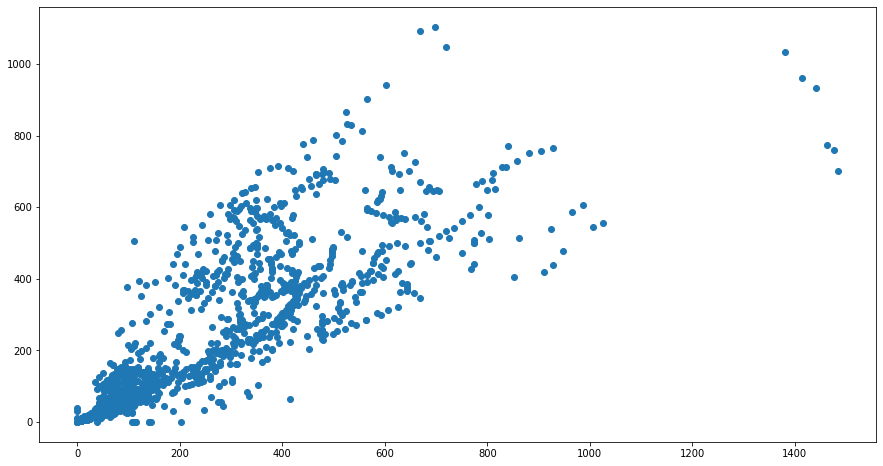

In [13]:
plt.figure(figsize=(15,8))
plt.scatter(x=data.iloc[:, 0:9], y=data.iloc[:, 9:])

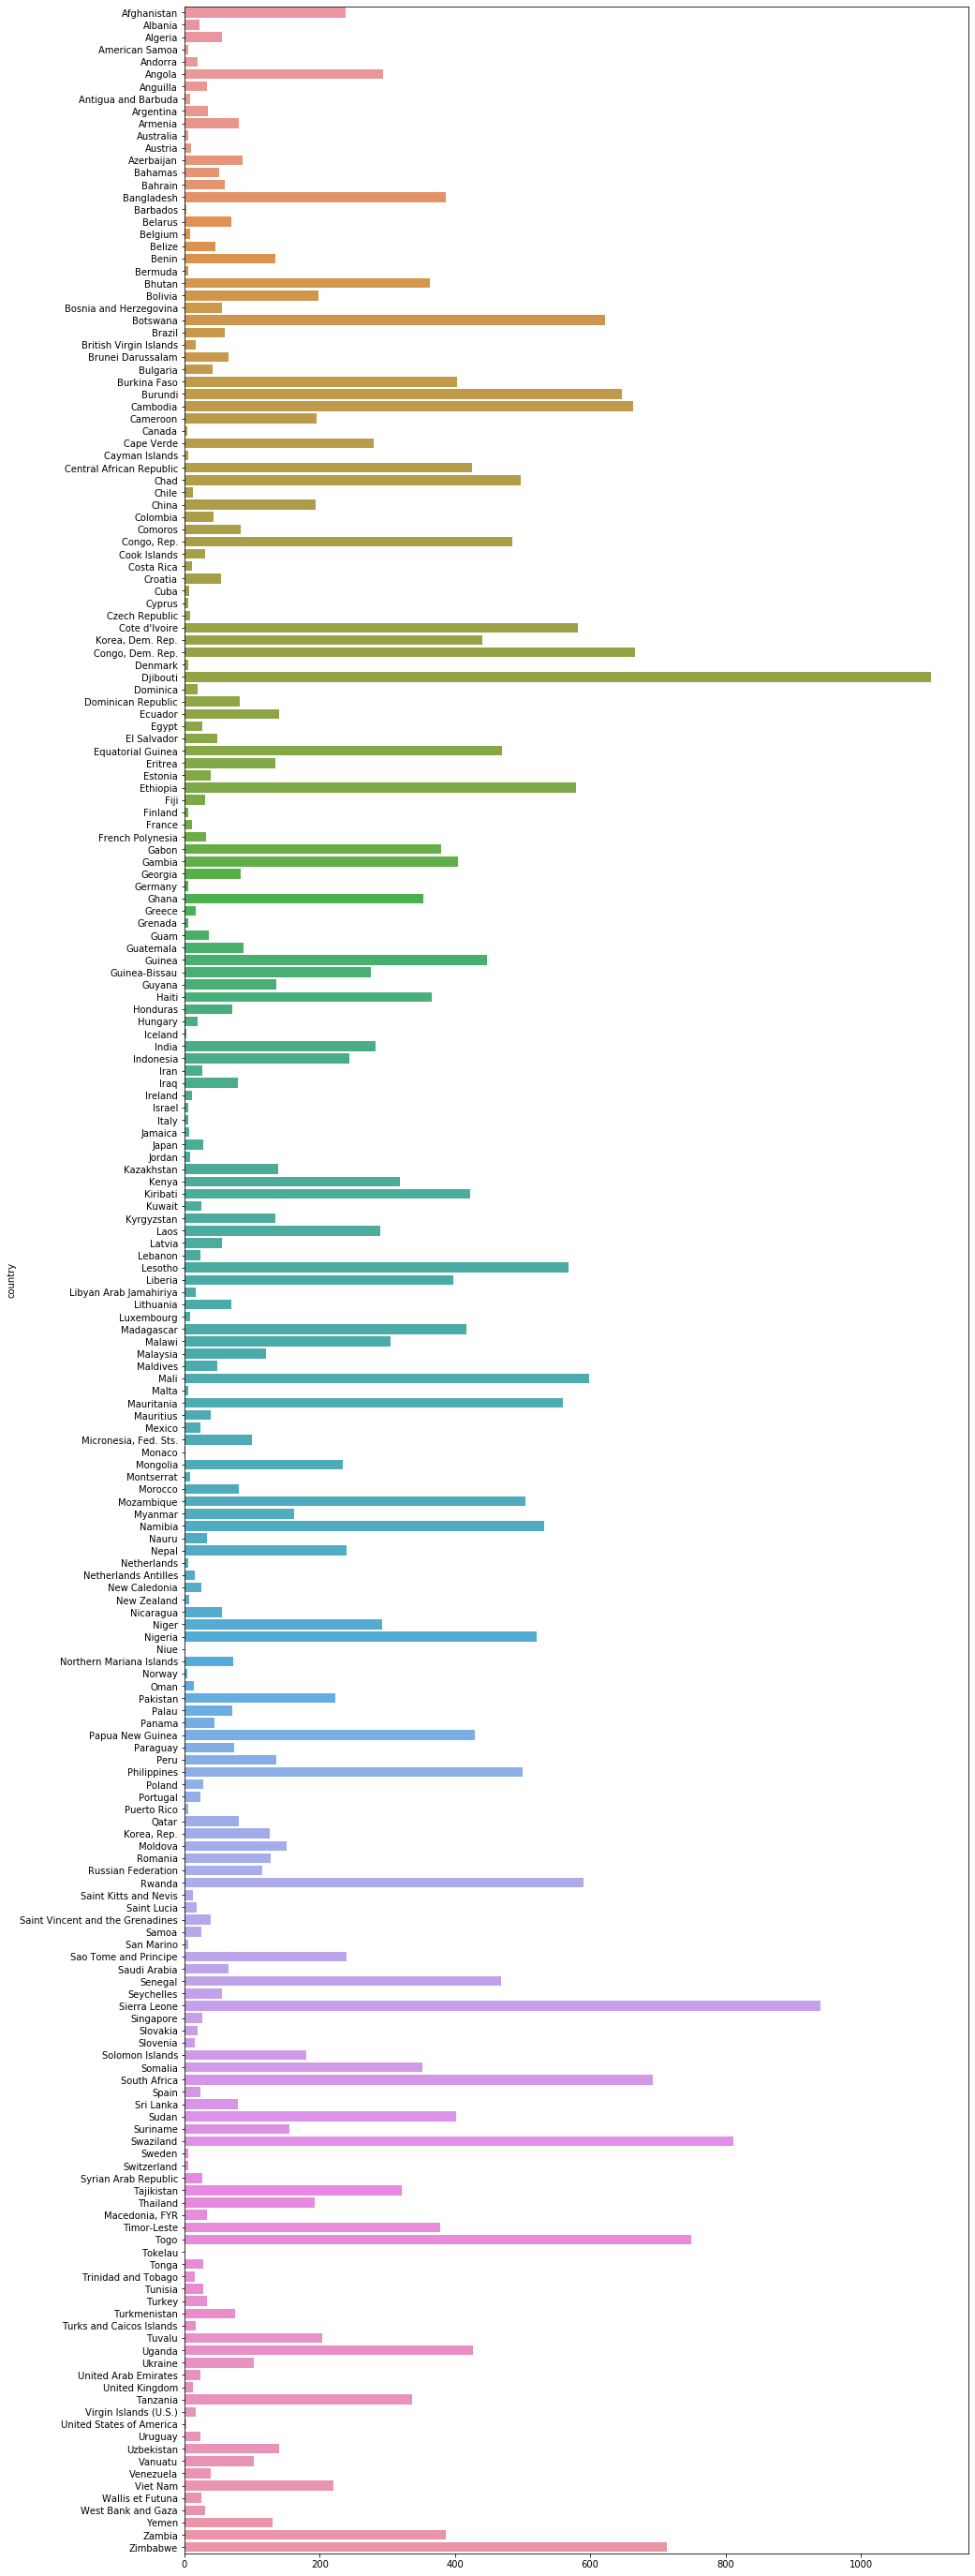

In [14]:
plt.figure(figsize=(15,50))
sns.barplot(y=data.index[:], x=data['2007'].values)

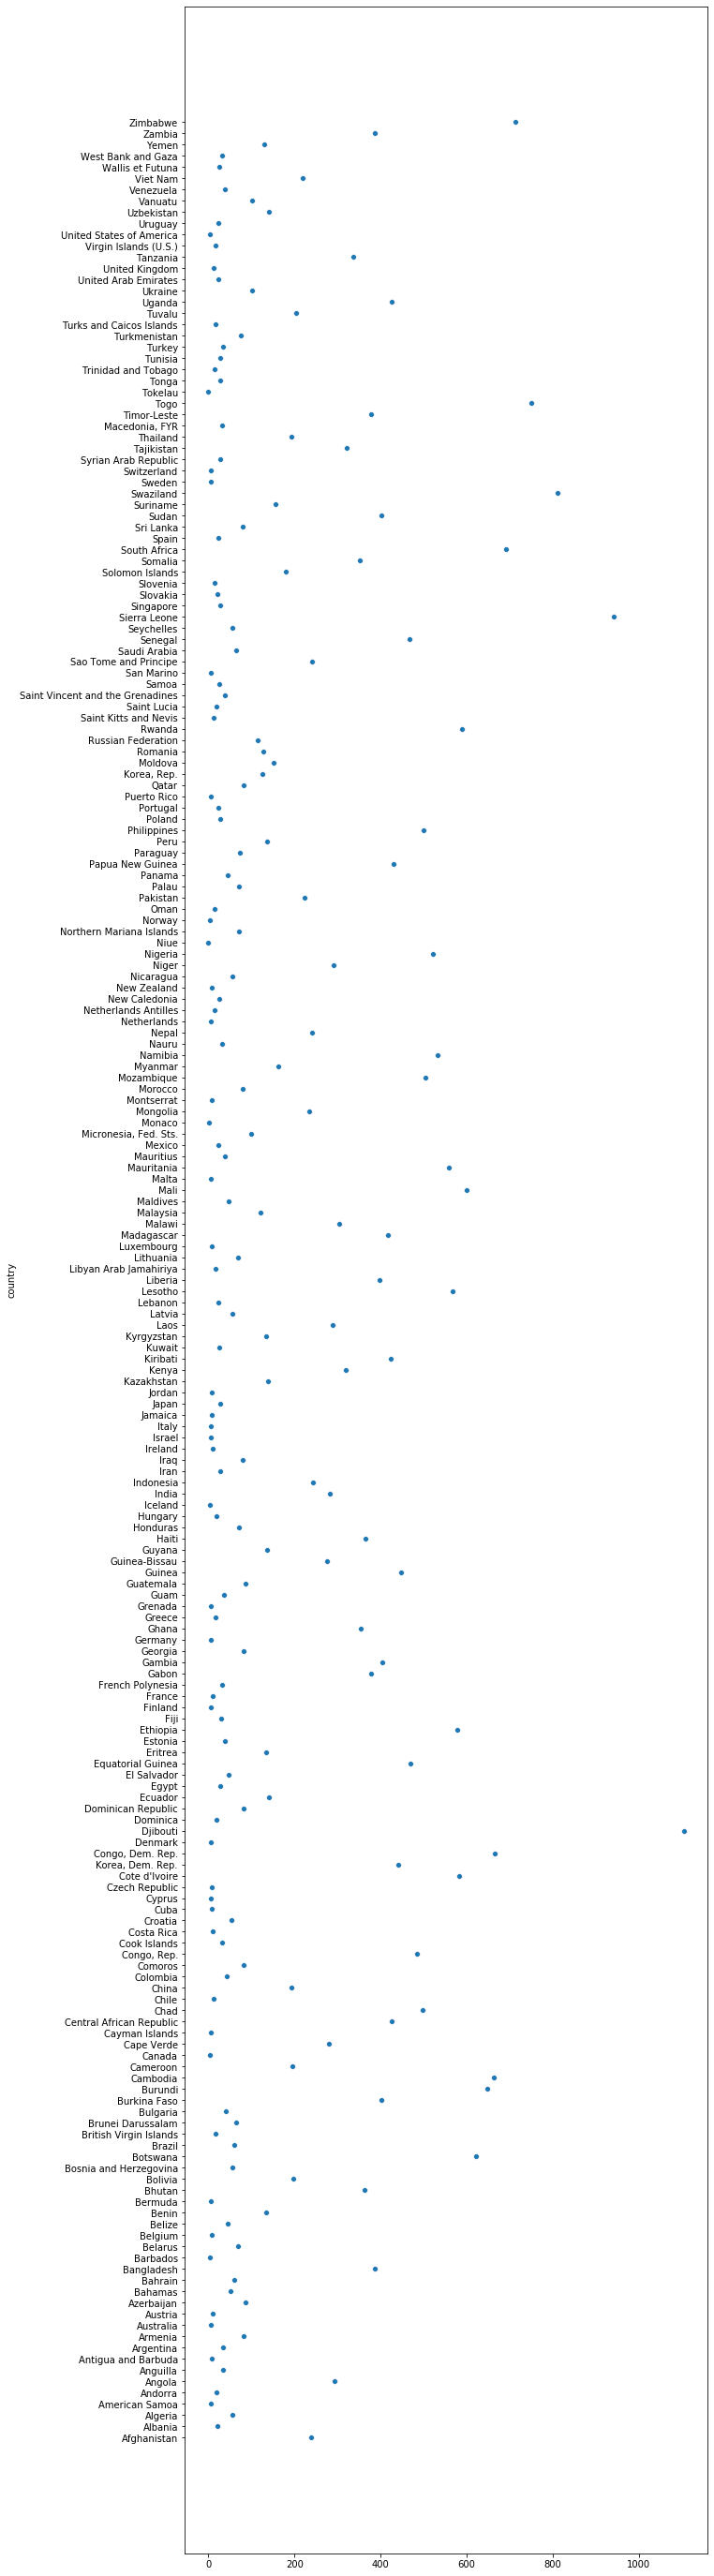

In [15]:
plt.figure(figsize=(10,50))
sns.scatterplot(y=data.index[:], x=data['2007'].values)

#  5. Apply PCA first

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
data_2d = pca.transform(data)

In [18]:
# Creating a new Data frame to store PCA values 

data_2df = pd.DataFrame(data_2d)
data_2df.index = data.index
data_2df.columns = ['PC1','PC2']
data_2df.head()

,PC1,PC2
country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


In [19]:
pca.explained_variance_ratio_

array([0.91808789, 0.060556  ])

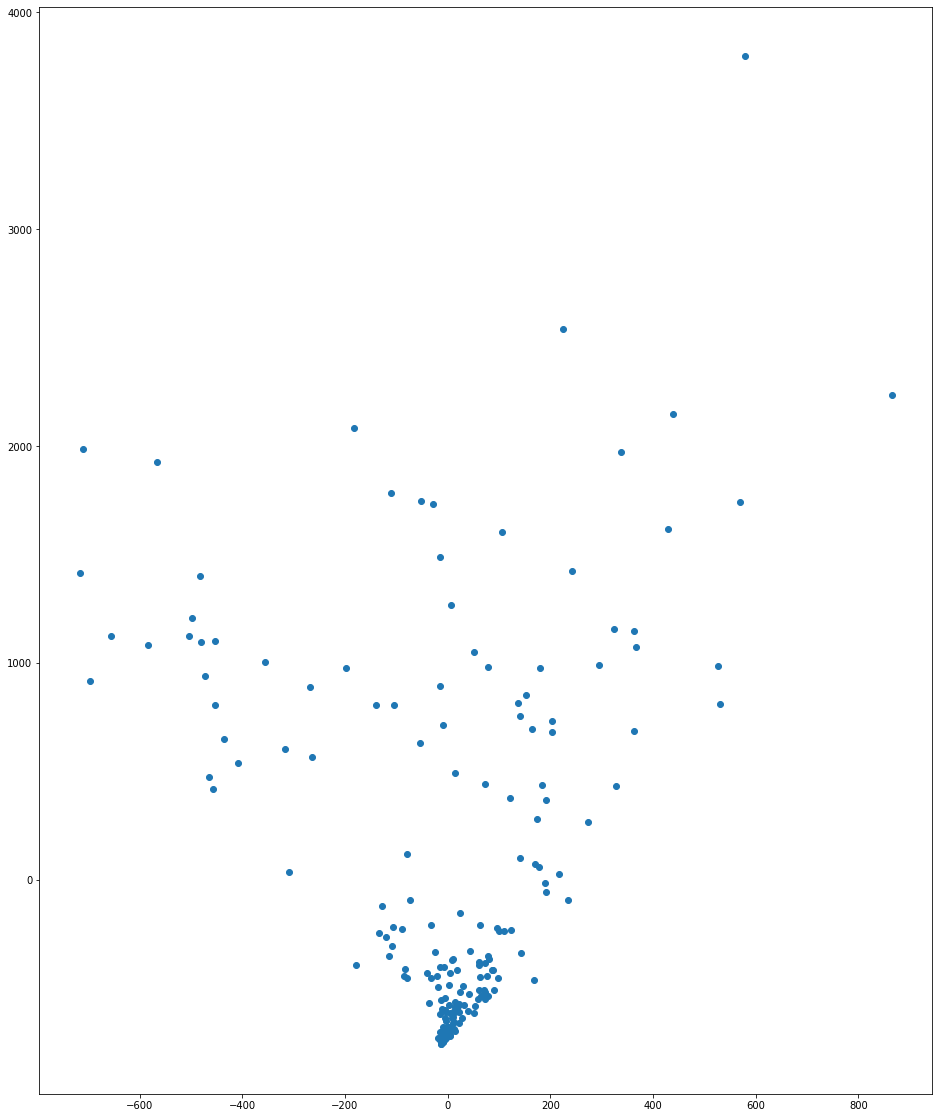

In [20]:
plt.figure(figsize=(16,20))
plt.scatter(x=data_2df['PC2'], y=data_2df['PC1'])

# 6. Plot elbow chart to find out optimal number of clusters.

In [21]:
X = data_2df[['PC1', 'PC2']].values

# 7. K means

In [22]:
# KMeans Clustering

from sklearn.cluster import KMeans

wcss = []
# within cluster sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [23]:
wcss

[159800889.4168412,
 41783709.430307396,
 24862370.135333177,
 19761899.046677537,
 15147311.459985364,
 11453933.484283537,
 9459871.302383099,
 7647591.103620627,
 6298753.407123994,
 5497572.859742675]

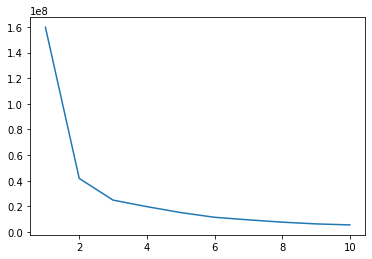

In [24]:
plt.plot(range(1,11), wcss)

In [25]:
# n_clusters = 3
# we can fit kmeans algorithm with it

kmeans = KMeans(n_clusters=3, init='k-means++')
y_kmeans = kmeans.fit_predict(X)

In [26]:
y_kmeans

array([2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 0, 2])

In [27]:
dfc = data_2df.copy()

In [28]:
Y = pd.DataFrame(y_kmeans, index=data.index)

In [29]:
# Created a copy of orignal dataset to avoid data loss

dfc = pd.concat([dfc, Y], axis=1)
dfc.head()

,PC1,PC2,0
country,,,
Afghanistan,732.215864,203.381494,2
Albania,-613.296510,4.715978,1
Algeria,-569.303713,-36.837051,1
American Samoa,-717.082766,5.464696,1
Andorra,-661.802241,11.037736,1


In [30]:
dfc = dfc.rename(columns={0: 'Y'})
dfc.head()

,PC1,PC2,Y
country,,,
Afghanistan,732.215864,203.381494,2
Albania,-613.296510,4.715978,1
Algeria,-569.303713,-36.837051,1
American Samoa,-717.082766,5.464696,1
Andorra,-661.802241,11.037736,1


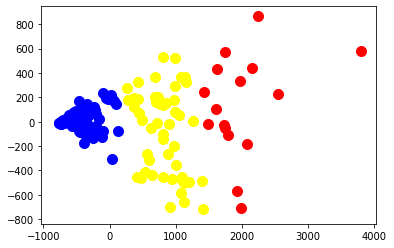

In [31]:
# Plotting the distribution of the clusters

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='yellow')

In [32]:
# silhouette_score is used to measure the accuarcy of model
# in case of kMeans clusters or hierarchical clusters

from sklearn.metrics import silhouette_score
print('Silhouette Score of KMeans: ',silhouette_score(X, y_kmeans))
print(round(silhouette_score(X, y_kmeans)))

Silhouette Score of KMeans:  0.6848530311707158
1.0


In [33]:
# The Silhouette score is 1, that means our cluster model is accrate

# 8. Hierarchical Clustering

In [34]:
# Hierarchical clustering is of type AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [35]:
y_hc

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1,
       1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 0], dtype=int64)

In [36]:
y_hier = pd.DataFrame(y_hc, index=data.index)

In [37]:
dfc = pd.concat([dfc, y_hier], axis=1)
dfc.head()

,PC1,PC2,Y,0
country,,,,
Afghanistan,732.215864,203.381494,2,0
Albania,-613.296510,4.715978,1,1
Algeria,-569.303713,-36.837051,1,1
American Samoa,-717.082766,5.464696,1,1
Andorra,-661.802241,11.037736,1,1


In [38]:
dfc = dfc.rename(columns={0: 'Y_Hierarchical', 'Y': 'Y_Kmeans'})

In [39]:
dfc.head()

,PC1,PC2,Y_Kmeans,Y_Hierarchical
country,,,,
Afghanistan,732.215864,203.381494,2,0
Albania,-613.296510,4.715978,1,1
Algeria,-569.303713,-36.837051,1,1
American Samoa,-717.082766,5.464696,1,1
Andorra,-661.802241,11.037736,1,1


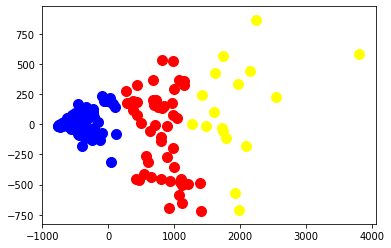

In [40]:
# Plotting the same for hierarchical clusters

plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='yellow')

In [41]:
# Accuracy of the Hierarchical model

from sklearn.metrics import silhouette_score
print('Silhouette Score of KMeans: ',silhouette_score(X, y_hc))
print(round(silhouette_score(X, y_hc)))

Silhouette Score of KMeans:  0.6799295814978142
1.0


In [42]:
# Model is giving less accuarcy than KMeans algorithm

# 9. Group the countries using the principal components and KMeans 

In [44]:
zero = []

for i in dfc.index[dfc['Y_Kmeans']==0]:
    zero.append(i)

In [45]:
one = []

for i in dfc.index[dfc['Y_Kmeans']==1]:
    one.append(i)

In [46]:
two = []

for i in dfc.index[dfc['Y_Kmeans']==2]:
    two.append(i)

In [48]:
country = [zero, one, two]

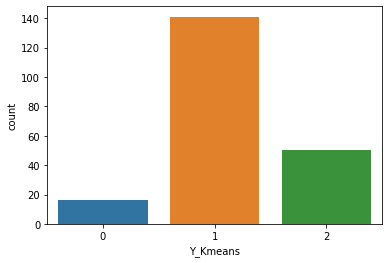

In [52]:
sns.countplot(dfc['Y_Kmeans'])
plt.show()

# 10. Which countries are consistent and which are largest importers of the good based on scale and position of cluster

In [58]:
print("Following countries having Consistent: ", two)

Following countries having Consistent:  ['Afghanistan', 'Angola', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Central African Republic', 'Chad', 'China', 'Congo, Rep.', "Cote d'Ivoire", 'Congo, Dem. Rep.', 'Equatorial Guinea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'India', 'Indonesia', 'Kenya', 'Laos', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mongolia', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Papua New Guinea', 'Peru', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Solomon Islands', 'Somalia', 'Sudan', 'Thailand', 'Tuvalu', 'Uganda', 'Tanzania', 'Viet Nam', 'Zimbabwe']


In [59]:
print("The largest importers of the goods are: ", one)

The largest importers of the goods are:  ['Albania', 'Algeria', 'American Samoa', 'Andorra', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bosnia and Herzegovina', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Cameroon', 'Canada', 'Cayman Islands', 'Chile', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guyana', 'Honduras', 'Hungary', 'Iceland', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Libyan Arab Jamahiriya', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 

#                                        - Thank you
#                                        Arpan Patnaik